In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Prices.xlsx', sheet_name='Daily', skiprows=8, usecols='D:E', index_col='Name')

In [3]:
df.head()

,US dollar
Name,
1978-12-29,226.00
1979-01-01,226.00
1979-01-02,226.80
1979-01-03,218.60
1979-01-04,223.15


In [4]:
df.index

DatetimeIndex(['1978-12-29', '1979-01-01', '1979-01-02', '1979-01-03',
               '1979-01-04', '1979-01-05', '1979-01-08', '1979-01-09',
               '1979-01-10', '1979-01-11',
               ...
               '2022-11-14', '2022-11-15', '2022-11-16', '2022-11-17',
               '2022-11-18', '2022-11-21', '2022-11-22', '2022-11-23',
               '2022-11-24', '2022-11-25'],
              dtype='datetime64[ns]', name='Name', length=11456, freq=None)

In [5]:
df.describe()

,US dollar
count,11456.000000
mean,726.172865
std,503.285459
min,216.850000
25%,354.287500
50%,422.500000
75%,1205.662500
max,2067.150000


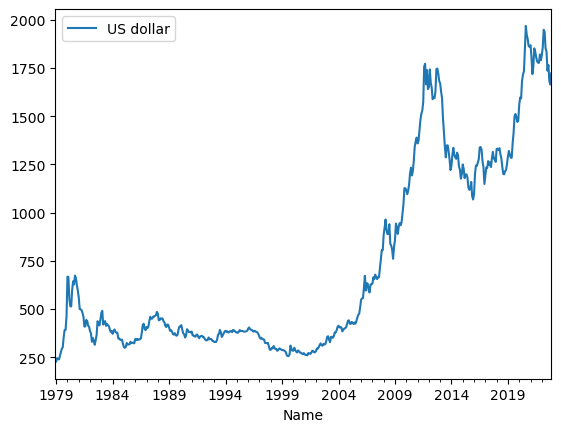

In [6]:
df.resample(rule='M').mean().plot()

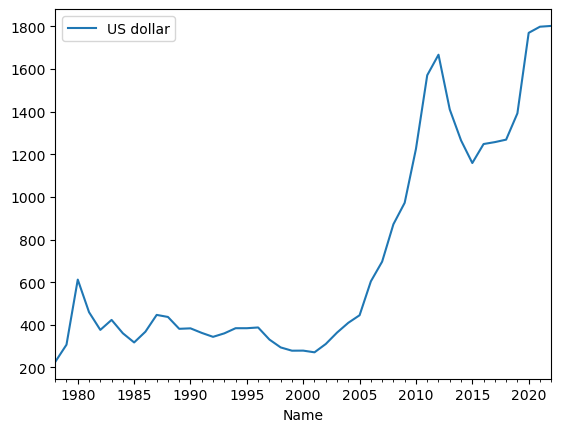

In [7]:
df.resample(rule='AS').mean().plot()

In [8]:
df.rename_axis('ds',inplace=True)
df.rename(columns={'US dollar':'y'}, inplace=True)
df.reset_index(inplace=True)

In [9]:
df.head()

,ds,y
0,1978-12-29,226.00
1,1979-01-01,226.00
2,1979-01-02,226.80
3,1979-01-03,218.60
4,1979-01-04,223.15


In [10]:
from fbprophet import Prophet

c:\Users\KushankSisodiya\miniconda3\envs\time_series\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [11]:
prophet_model = Prophet()
prophet_model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future_dataset= prophet_model.make_future_dataframe(periods=15, freq='y') # Next 15 YEARS OF DATA
future_dataset.tail()

,ds
11466,2032-12-31
11467,2033-12-31
11468,2034-12-31
11469,2035-12-31
11470,2036-12-31


In [25]:
type(future_dataset['ds'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
pred = prophet_model.predict(future_dataset)
pred[['ds','yhat', 'yhat_lower', 'yhat_upper']].head() # only useful columns

,ds,yhat,yhat_lower,yhat_upper
0,1978-12-29,179.762597,87.317981,273.193157
1,1979-01-01,184.672593,92.901498,279.988629
2,1979-01-02,186.340070,91.986176,278.202884
3,1979-01-03,188.170548,99.311563,289.447978
4,1979-01-04,189.934157,100.331888,283.043651


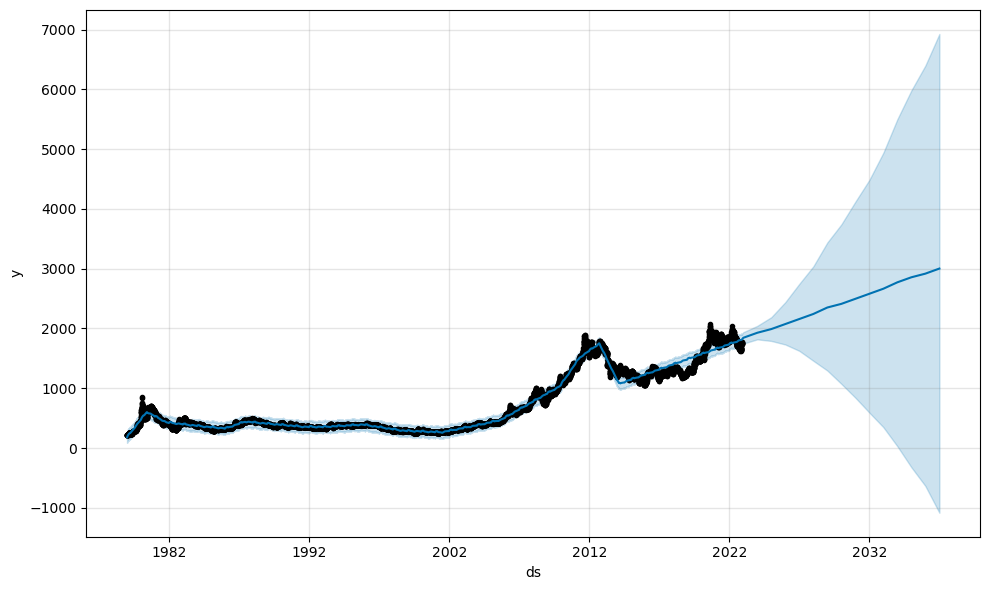

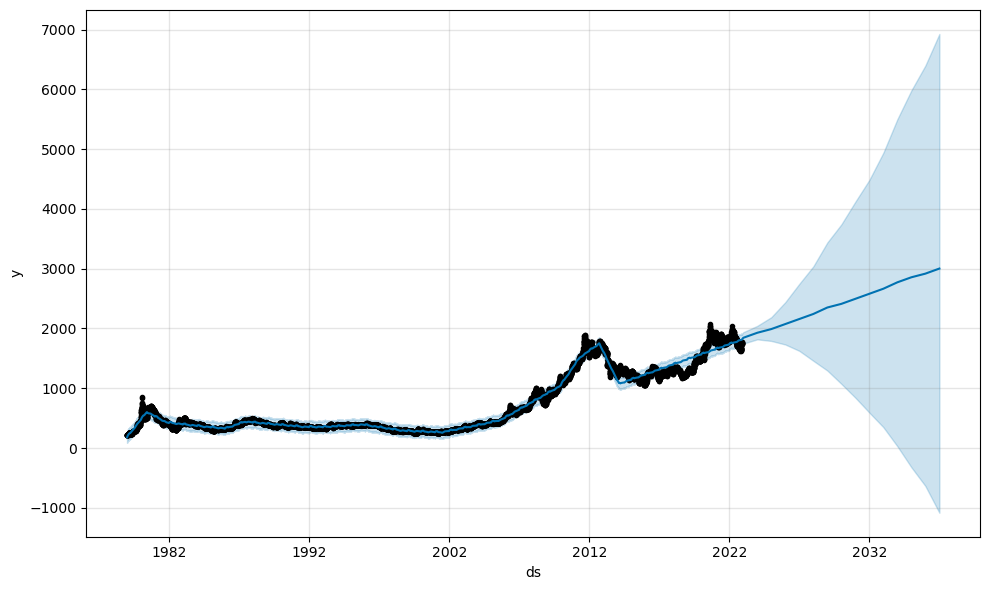

In [15]:
prophet_model.plot(pred)

In [16]:
import pickle

In [17]:
with open('fbprophet.pkl', 'wb') as fout: # saving the model in models directory
    pickle.dump(prophet_model, fout)

In [57]:
from fbprophet.serialize import model_to_json, model_from_json

with open('serialized_model.json', 'w') as fout:
    fout.write(model_to_json(prophet_model))  # Save model

with open('serialized_model.json', 'r') as fin:
    prophet_model = model_from_json(fin.read()) 
     # Load model
    future_df_1 = pd.DataFrame()
    future_df_1['ds'] = [pd.to_datetime("2000-04-21")]
    a = prophet_model.predict(future_df_1)

In [59]:
a

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-04-21,283.195124,188.358936,376.994576,283.195124,283.195124,-6.928265,-6.928265,-6.928265,-6.548087,-6.548087,-6.548087,-0.380179,-0.380179,-0.380179,0.0,0.0,0.0,276.266859


In [61]:
float(a["yhat"])

276.26685890688145